# Smart City IoT Sensor Data Analysis

**Grant No. BR24992852**: Intelligent models and methods of Smart City digital ecosystem for sustainable development and the citizens' quality of life improvement

This notebook performs Exploratory Data Analysis (EDA) on sensor data collected from March 1-7, 2025.

## Dataset Overview
- **Data Source**: IoT sensors (ESP Arduino microcontroller)
- **Collection Frequency**: Every 5 seconds via Wi-Fi
- **Total Records**: 120,960 measurements
- **Sensors**: Temperature, Humidity, Light, pH, Electrical Conductivity

## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Data

In [4]:
# Load the merged sensor data
df = pd.read_csv('../reports/sensor_data_merged.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Data loaded successfully!
Shape: 120960 rows × 6 columns


## 3. Initial Data Exploration

In [5]:
# Display first few rows
df.head(10)

,timestamp,temperature,humidity,light,pH,electrical_conductivity
0,2025-03-01 00:00:00,24.69,52.66,118.65,6.68,0.996
1,2025-03-01 00:00:05,21.89,50.18,801.71,7.29,1.044
2,2025-03-01 00:00:10,23.88,48.01,682.39,7.66,1.354
3,2025-03-01 00:00:15,20.42,56.73,146.05,7.77,0.519
4,2025-03-01 00:00:20,20.79,41.54,106.87,7.77,1.900
5,2025-03-01 00:00:25,21.45,43.18,740.09,7.45,1.196
6,2025-03-01 00:00:30,22.50,56.93,292.49,6.04,0.577
7,2025-03-01 00:00:35,24.10,48.17,696.89,7.04,0.808
8,2025-03-01 00:00:40,21.44,54.14,340.67,7.42,1.964
9,2025-03-01 00:00:45,20.67,53.88,709.49,7.43,1.023


In [6]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120960 entries, 0 to 120959
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   timestamp                120960 non-null  object 
 1   temperature              120960 non-null  float64
 2   humidity                 120960 non-null  float64
 3   light                    120960 non-null  float64
 4   pH                       120960 non-null  float64
 5   electrical_conductivity  120960 non-null  float64
dtypes: float64(5), object(1)
memory usage: 5.5+ MB


In [7]:
# Statistical summary
df.describe()

,temperature,humidity,light,pH,electrical_conductivity
count,120960.000000,120960.000000,120960.000000,120960.000000,120960.000000
mean,22.500301,50.026163,549.103790,7.000135,1.249303
std,1.442144,5.766784,259.726259,0.576866,0.433405
min,20.000000,40.000000,100.000000,6.000000,0.500000
25%,21.250000,45.050000,323.670000,6.500000,0.875000
50%,22.500000,50.060000,548.910000,7.000000,1.249000
75%,23.750000,55.010000,773.690000,7.500000,1.625000
max,25.000000,60.000000,999.990000,8.000000,2.000000


## 4. Check for Missing Values

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing values per column:
timestamp                  0
temperature                0
humidity                   0
light                      0
pH                         0
electrical_conductivity    0
dtype: int64

Total missing values: 0


## 5. Correlation Analysis

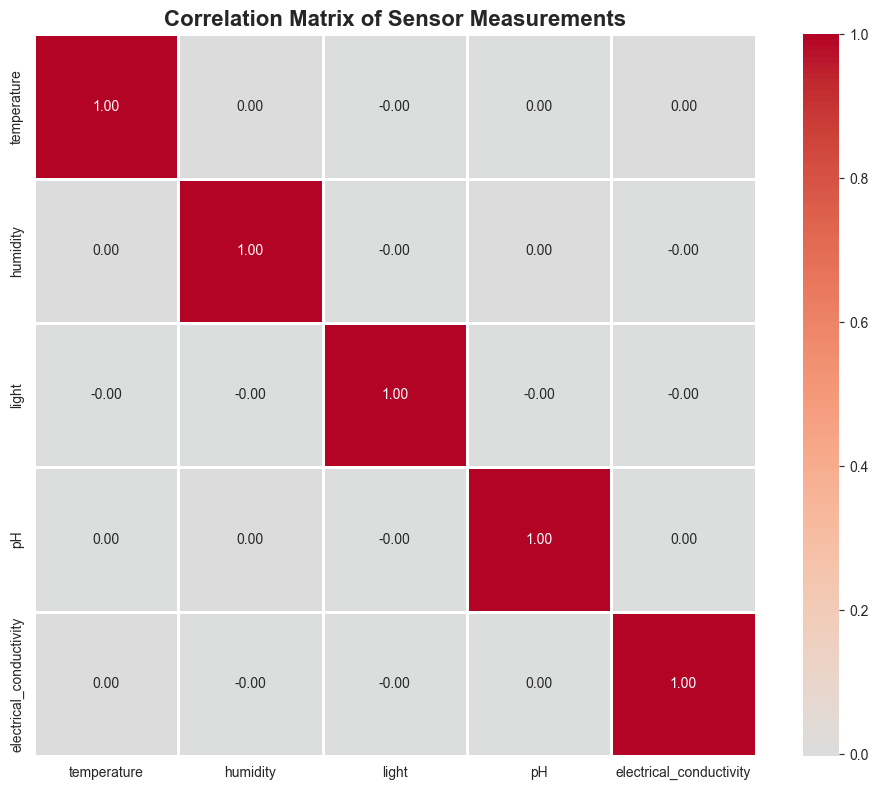


Correlation Matrix:
                         temperature  humidity     light        pH  \
temperature                 1.000000  0.003655 -0.000423  0.000742   
humidity                    0.003655  1.000000 -0.001196  0.001540   
light                      -0.000423 -0.001196  1.000000 -0.002546   
pH                          0.000742  0.001540 -0.002546  1.000000   
electrical_conductivity     0.003117 -0.001568 -0.001242  0.001322   

                         electrical_conductivity  
temperature                             0.003117  
humidity                               -0.001568  
light                                  -0.001242  
pH                                      0.001322  
electrical_conductivity                 1.000000  


In [9]:
# Calculate correlation matrix
correlation_matrix = df[['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Sensor Measurements', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

## 6. Distribution Plots

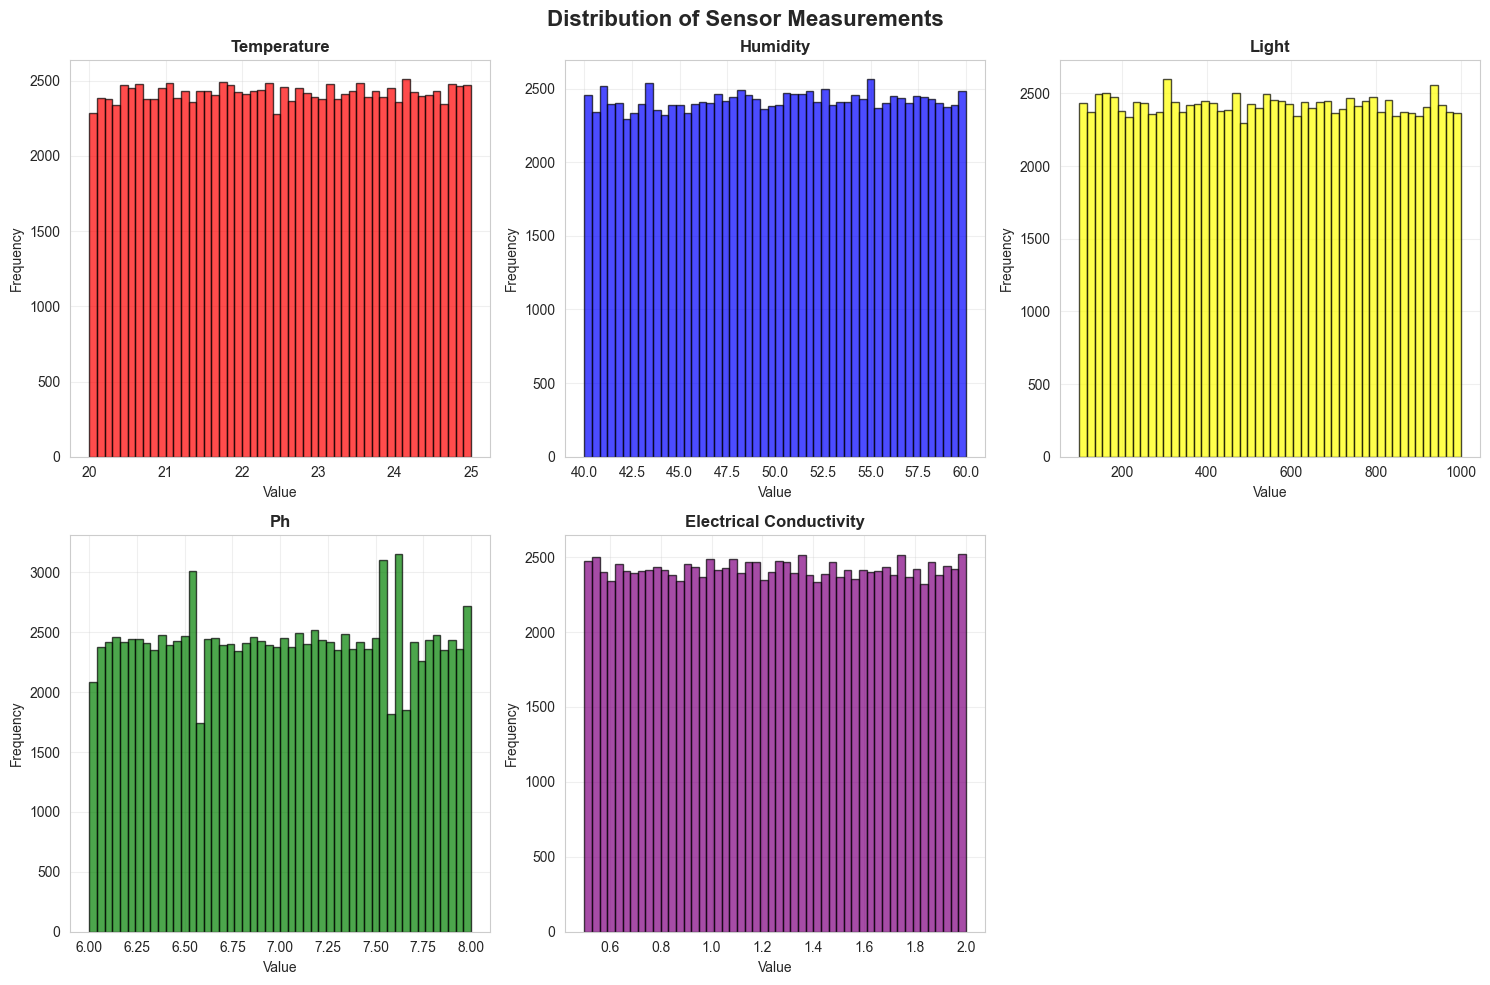

In [10]:
# Distribution plots for all sensor measurements
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Sensor Measurements', fontsize=16, fontweight='bold')

sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']
colors = ['red', 'blue', 'yellow', 'green', 'purple']

for idx, (sensor, color) in enumerate(zip(sensors, colors)):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[sensor], bins=50, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{sensor.replace("_", " ").title()}', fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()
plt.close()


## 8. Box Plots for Outlier Detection

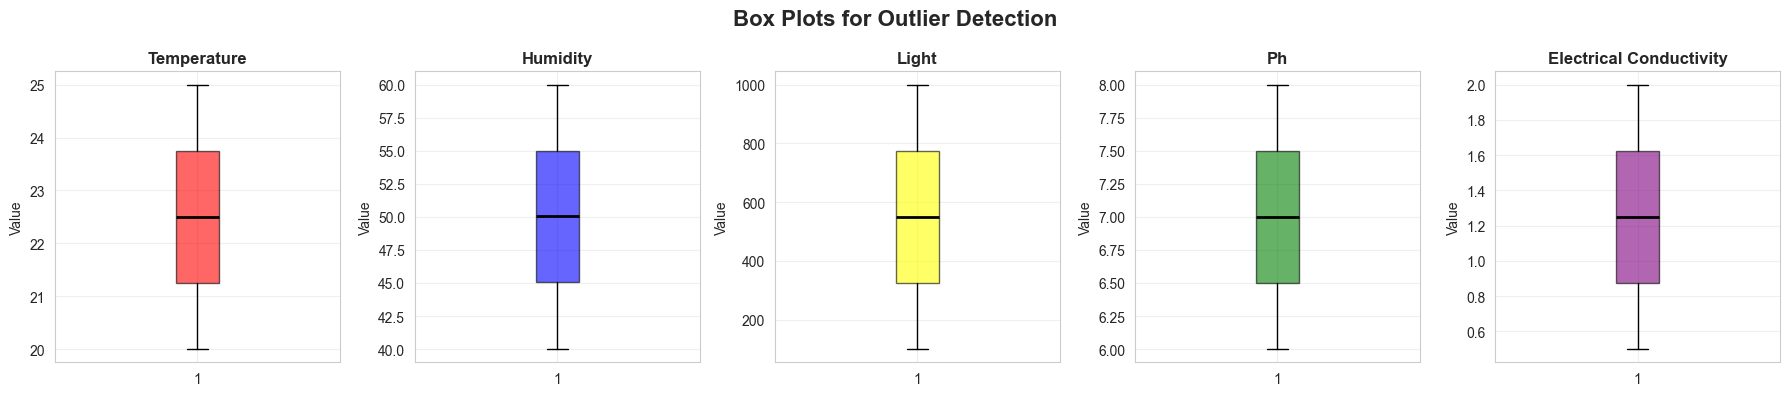

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [12]:
# Box plots to identify outliers
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']
colors = ['red', 'blue', 'yellow', 'green', 'purple']

for idx, (sensor, color) in enumerate(zip(sensors, colors)):
    axes[idx].boxplot(df[sensor], patch_artist=True,
                      boxprops=dict(facecolor=color, alpha=0.6),
                      medianprops=dict(color='black', linewidth=2))
    axes[idx].set_title(sensor.replace('_', ' ').title(), fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close

## 9. Time Series Analysis

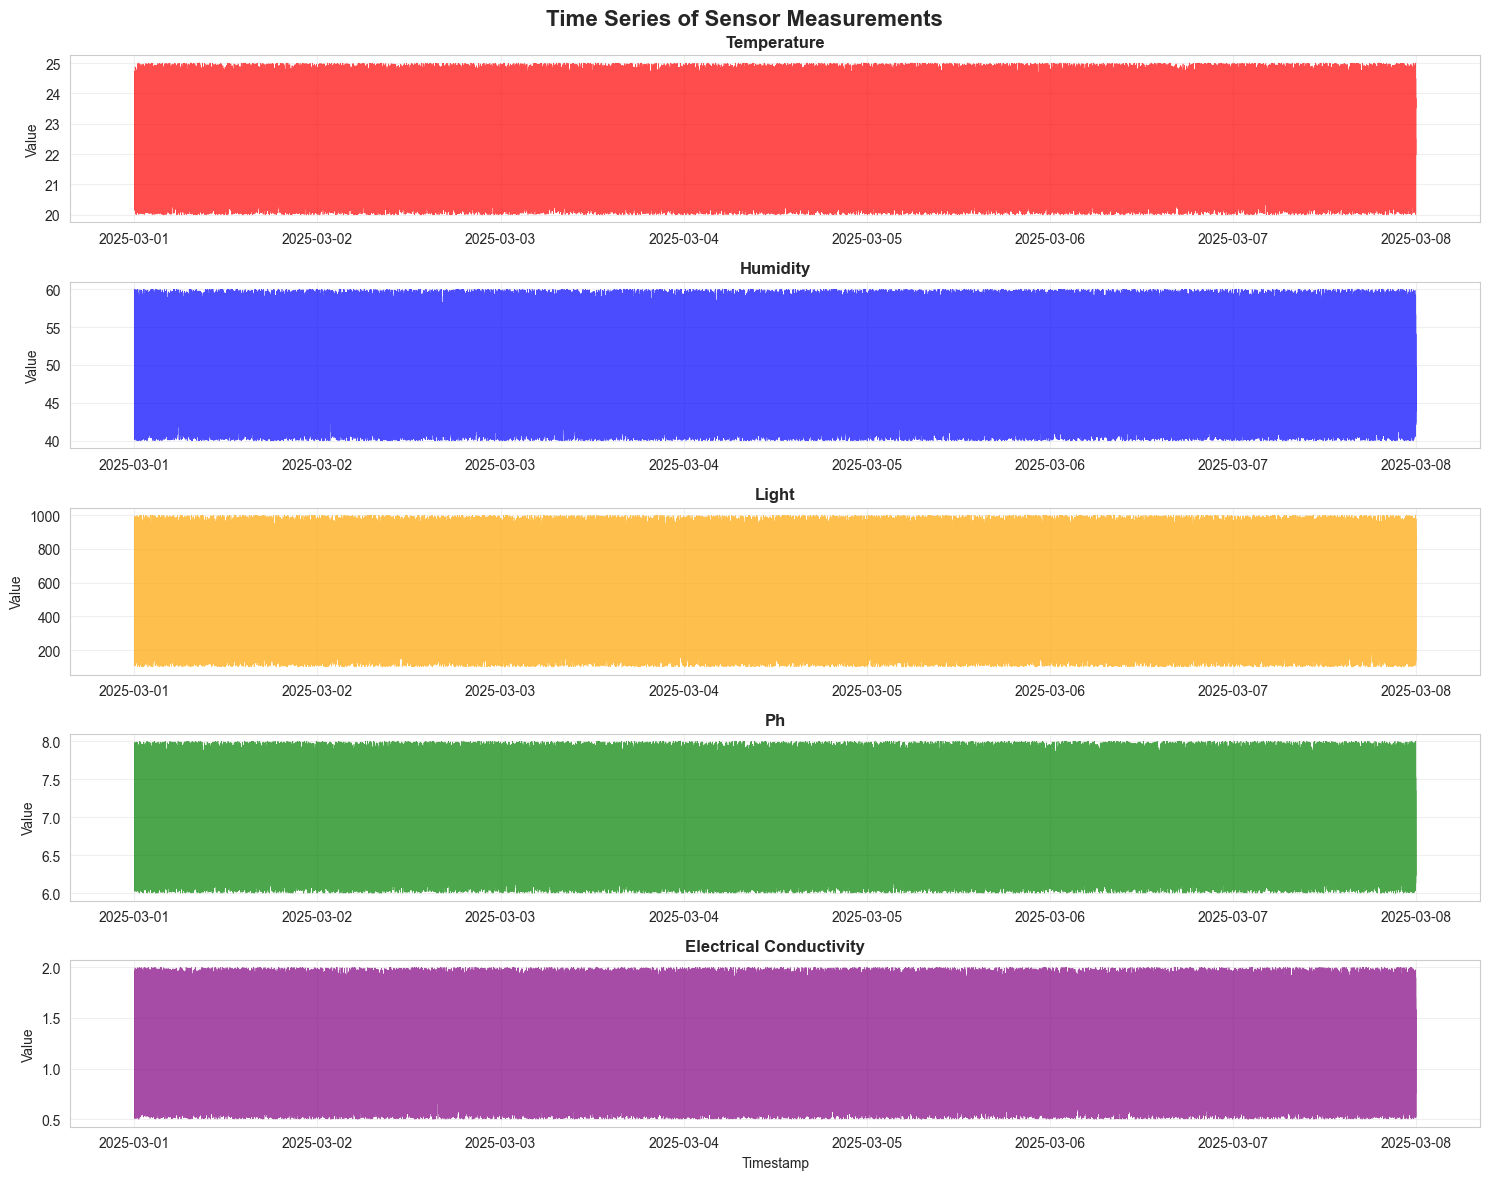

In [13]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot time series for all sensors
fig, axes = plt.subplots(5, 1, figsize=(15, 12))
fig.suptitle('Time Series of Sensor Measurements', fontsize=16, fontweight='bold')

sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']
colors = ['red', 'blue', 'orange', 'green', 'purple']

for idx, (sensor, color) in enumerate(zip(sensors, colors)):
    axes[idx].plot(df['timestamp'], df[sensor], color=color, alpha=0.7, linewidth=0.5)
    axes[idx].set_title(sensor.replace('_', ' ').title(), fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)
    
axes[-1].set_xlabel('Timestamp')
plt.tight_layout()
plt.show()
plt.close()

## 12. Statistical Summary by Sensor

In [ ]:
# Compute detailed statistics for each sensor
sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']

print("=" * 80)
print("DETAILED STATISTICAL SUMMARY BY SENSOR")
print("=" * 80)
print()

for sensor in sensors:
    print(f"\n{'=' * 80}")
    print(f"{sensor.replace('_', ' ').upper()}")
    print(f"{'=' * 80}")
    print(f"Mean:              {df[sensor].mean():.4f}")
    print(f"Median:            {df[sensor].median():.4f}")
    print(f"Minimum:           {df[sensor].min():.4f}")
    print(f"Maximum:           {df[sensor].max():.4f}")
    print(f"Range:             {df[sensor].max() - df[sensor].min():.4f}")
    print(f"Variance:          {df[sensor].var():.4f}")
    print(f"Std Deviation:     {df[sensor].std():.4f}")
    print(f"25th Percentile:   {df[sensor].quantile(0.25):.4f}")
    print(f"75th Percentile:   {df[sensor].quantile(0.75):.4f}")
    print(f"IQR:               {df[sensor].quantile(0.75) - df[sensor].quantile(0.25):.4f}")
    print(f"Skewness:          {df[sensor].skew():.4f}")
    print(f"Kurtosis:          {df[sensor].kurtosis():.4f}")

print("\n" + "=" * 80)

## 13. Day-Night Light Cycle Analysis

In [ ]:
# Extract hour from timestamp and analyze day-night patterns
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

# Plot light intensity by hour of day
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Hourly average light intensity
hourly_light = df.groupby('hour')['light'].mean()
axes[0].plot(hourly_light.index, hourly_light.values, marker='o', linewidth=2, markersize=8, color='orange')
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Average Light Intensity', fontsize=12)
axes[0].set_title('Day-Night Light Cycle: Average Light Intensity by Hour', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvspan(0, 6, alpha=0.2, color='navy', label='Night')
axes[0].axvspan(18, 24, alpha=0.2, color='navy')
axes[0].axvspan(6, 18, alpha=0.2, color='yellow', label='Day')
axes[0].legend()
axes[0].set_xticks(range(0, 24))

# Light intensity over time colored by day/night
night_mask = (df['hour'] >= 18) | (df['hour'] < 6)
day_mask = ~night_mask

axes[1].scatter(df[day_mask]['timestamp'], df[day_mask]['light'], 
                s=0.5, alpha=0.3, color='orange', label='Daytime')
axes[1].scatter(df[night_mask]['timestamp'], df[night_mask]['light'], 
                s=0.5, alpha=0.3, color='navy', label='Nighttime')
axes[1].set_xlabel('Timestamp', fontsize=12)
axes[1].set_ylabel('Light Intensity', fontsize=12)
axes[1].set_title('Light Intensity Timeline: Day vs Night', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

# Print day-night statistics
print("\nDAY-NIGHT LIGHT CYCLE ANALYSIS")
print("=" * 60)
day_light = df[day_mask]['light'].mean()
night_light = df[night_mask]['light'].mean()
print(f"Average Light (Daytime 6am-6pm):    {day_light:.2f}")
print(f"Average Light (Nighttime 6pm-6am):  {night_light:.2f}")
print(f"Day-Night Difference:               {day_light - night_light:.2f}")
print(f"Ratio (Day/Night):                  {day_light / night_light if night_light != 0 else 'N/A':.2f}x")

## 14. Temperature-Humidity Relationship Analysis

In [ ]:
# Analyze temperature-humidity inverse relationship
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot with regression line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['temperature'], df['humidity'])
line = slope * df['temperature'] + intercept

axes[0, 0].scatter(df['temperature'], df['humidity'], alpha=0.3, s=1, color='blue')
axes[0, 0].plot(df['temperature'], line, 'r-', linewidth=2, label=f'Linear fit (r={r_value:.4f})')
axes[0, 0].set_xlabel('Temperature', fontsize=12)
axes[0, 0].set_ylabel('Humidity', fontsize=12)
axes[0, 0].set_title('Temperature vs Humidity with Linear Regression', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Time series overlay
ax1 = axes[0, 1]
ax2 = ax1.twinx()
ax1.plot(df['timestamp'], df['temperature'], color='red', alpha=0.7, linewidth=0.5, label='Temperature')
ax2.plot(df['timestamp'], df['humidity'], color='blue', alpha=0.7, linewidth=0.5, label='Humidity')
ax1.set_xlabel('Timestamp', fontsize=12)
ax1.set_ylabel('Temperature', color='red', fontsize=12)
ax2.set_ylabel('Humidity', color='blue', fontsize=12)
ax1.set_title('Temperature and Humidity Time Series Overlay', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, alpha=0.3)

# Hourly averages
hourly_temp = df.groupby('hour')['temperature'].mean()
hourly_humidity = df.groupby('hour')['humidity'].mean()

axes[1, 0].plot(hourly_temp.index, hourly_temp.values, marker='o', color='red', 
                linewidth=2, markersize=8, label='Temperature')
axes[1, 0].set_xlabel('Hour of Day', fontsize=12)
axes[1, 0].set_ylabel('Average Temperature', color='red', fontsize=12)
axes[1, 0].tick_params(axis='y', labelcolor='red')
axes[1, 0].set_title('Hourly Temperature and Humidity Patterns', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24))

ax_humidity = axes[1, 0].twinx()
ax_humidity.plot(hourly_humidity.index, hourly_humidity.values, marker='s', color='blue', 
                 linewidth=2, markersize=8, label='Humidity')
ax_humidity.set_ylabel('Average Humidity', color='blue', fontsize=12)
ax_humidity.tick_params(axis='y', labelcolor='blue')

# Correlation by hour
hourly_corr = df.groupby('hour').apply(lambda x: x['temperature'].corr(x['humidity']))
axes[1, 1].bar(hourly_corr.index, hourly_corr.values, color='purple', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Hour of Day', fontsize=12)
axes[1, 1].set_ylabel('Correlation Coefficient', fontsize=12)
axes[1, 1].set_title('Temperature-Humidity Correlation by Hour', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()
plt.close()

# Print relationship statistics
print("\nTEMPERATURE-HUMIDITY RELATIONSHIP ANALYSIS")
print("=" * 60)
print(f"Overall Correlation:        {r_value:.4f}")
print(f"Relationship Type:          {'Inverse' if r_value < 0 else 'Direct'}")
print(f"Linear Regression:")
print(f"  Slope:                    {slope:.6f}")
print(f"  Intercept:                {intercept:.4f}")
print(f"  R-squared:                {r_value**2:.4f}")
print(f"  P-value:                  {p_value:.6f}")
print(f"  Statistical Significance: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")